# Factors Affecting Student Performance at the University Level

This project aims to understand how certain factors affect student performance within higher education, which I am measuring by examining the proportion of students that graduate as well as their earnings after graduation. In looking at all these factors, I hope to determine if certain elements are more influential in determining the overall success of students.

[College Scorecard](https://collegescorecard.ed.gov/) draws most of its data from IPEDS (Integrated Postsecondary Education Data System), compiling statistics varying from average cost to demographics to location. The scorecard was created to increase transparency regarding higher education and to help prospective students weigh out the costs and values of each school. 

The factors that I will examine are control (public, private nonprofit, private for-profit) and ranking. 

This project will include: 

* Basic statistics about 4-year universities from the 2016-2017 academic year

* Comparisons amongst schools based on controls, ranking, and location by state

* Visualization (graphs) of the relationship between each factor and graduation rates/earnings

Data about the schools' control, graduation rates, and students' earnings comes from [College Scorecard](https://collegescorecard.ed.gov/). School rankings will come from [US News & World Report](https://www.usnews.com/best-colleges/rankings/national-universities). In this project, I will only be looking at 4-year undergraduate universities.



### Important Variables:
*Control* defines how the school is owned. The three different kinds of ownership are public, private nonprofit, and private for-profit. College Scoreboard denotes them as 1, 2, and 3, respectively.

*Rankings* of the universities are published by a variety of sources, but I will be using US News & World Report. I will be examining the top 25 universities and top 25 liberal arts colleges and comparing them with the rest of the universities.

*Graduation rates* is the completion rate for first-time, full-time students at four-year institutions (100% of expected time to completion - 4 years).

*Earnings* are determined by calculating the mean earnings of students working and not enrolled 10 years after entry and the Median earnings of students working and not enrolled 10 years after entry.



### Data Dictionary:
Below are the names of columns  I am pulling from the data and their coinciding data descriptions as provided by College Scorecard.

*INSTNM*: Institution name

*STABBR*: State postcode

*PREDDEG*: Predominant undergraduate degree awarded
* 0 Not classified
* 1 Predominantly certificate-degree granting
* 2 Predominantly associate's-degree granting
* 3 Predominantly bachelor's-degree granting
* 4 Entirely graduate-degree granting

*CONTROL*: Control of institution
* 1	Public
* 2	Private nonprofit
* 3	Private for-profit

*MN_EARN_WNE_P10*: Mean earnings of students working and not enrolled 10 years after entry

*C100_4*: Completion rate for first-time, full-time students at four-year institutions (100% of expected time to completion)


In [1]:
# importing necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import decimal


## Reading in College Scorecard Data

In [2]:
# link to most recent data

file_url1 = "https://ed-public-download.app.cloud.gov/downloads/Most-Recent-Cohorts-All-Data-Elements.csv"

In [4]:
# read into pandas

scorecard = pd.read_csv(file_url1)

## Cleaning up Scorecard Data

In [5]:
# narrowing data to just the columns we want

scorecard = scorecard[["INSTNM", "STABBR", "PREDDEG", "CONTROL", "MN_EARN_WNE_P10", "C100_4"]]

In [6]:
# only includes predominantly bachelor's-degree granting universities

scorecard = scorecard[scorecard["PREDDEG"] == 3]

In [7]:
# renaming columns 

scorecard.rename(columns={"INSTNM":"School_Name", "STABBR": "State", "PREDDEG": "Degree_Type", "CONTROL": 
                          "Ownership", "MN_EARN_WNE_P10": "Earnings",
                          "C100_4": "Completion_Rate"}, inplace=True)

In [8]:
# replacing missing data in "Earnings" column with NaN so that datatype of the column can be converted to float

scorecard.replace({"PrivacySuppressed": np.nan}, inplace = True)

In [9]:
scorecard.head()

,School_Name,State,Degree_Type,Ownership,Earnings,Completion_Rate
0,Alabama A & M University,AL,3,1,35500,0.0643
1,University of Alabama at Birmingham,AL,3,1,48400,0.3018
2,Amridge University,AL,3,2,47600,0.1429
3,University of Alabama in Huntsville,AL,3,1,52000,0.1533
4,Alabama State University,AL,3,1,30600,0.0725


In [36]:
# convert "Earnings" dtype from object to float

scorecard.Earnings = scorecard.Earnings.astype("float64", inplace = True)

scorecard.dtypes

School_Name         object
State               object
Degree_Type          int64
Ownership            int64
Earnings           float64
Completion_Rate    float64
dtype: object

## Read in Ranking Data

In [11]:
# read in US News ranking data for national universities and liberal arts colleges

file_url2 = "https://github.com/claireyzhang/data_bootcamp_final_project/raw/master/us_news_rankings.xlsx"

ranking = pd.read_excel(file_url2)

In [12]:
ranking.head()

,NU_Rank,NU_School,NU_State,LA_Rank,LA_School,LA_State
0,1,Princeton University,NJ,1.0,Williams College,MA
1,2,Harvard University,MA,2.0,Amherst College,MA
2,3,Columbia University,NY,3.0,Swarthmore College,PA
3,3,Massachusetts Institute of Technology,MA,3.0,Wellesley College,MA
4,3,University of Chicago,IL,5.0,Bowdoin College,ME


## Control

In [37]:
# group dataframe by type of ownership

control_grad = scorecard.groupby(["Ownership"])

In [38]:
# creates dataframe of just public universities

public = control_grad.get_group(1)

public.head()

,School_Name,State,Degree_Type,Ownership,Earnings,Completion_Rate
0,Alabama A & M University,AL,3,1,35500.0,0.0643
1,University of Alabama at Birmingham,AL,3,1,48400.0,0.3018
3,University of Alabama in Huntsville,AL,3,1,52000.0,0.1533
4,Alabama State University,AL,3,1,30600.0,0.0725
5,The University of Alabama,AL,3,1,51600.0,0.4385


In [39]:
# creates dataframe of just private non-profit universities

nonprof = control_grad.get_group(2)

nonprof.head()

,School_Name,State,Degree_Type,Ownership,Earnings,Completion_Rate
2,Amridge University,AL,3,2,47600.0,0.1429
10,Birmingham Southern College,AL,3,2,53100.0,0.6196
12,Concordia College Alabama,AL,3,2,25400.0,0.0056
16,Faulkner University,AL,3,2,40700.0,0.1810
23,Huntingdon College,AL,3,2,43600.0,0.2620


In [40]:
# creates dataframe of just for-profit universities

forprof = control_grad.get_group(3)

forprof.head()

,School_Name,State,Degree_Type,Ownership,Earnings,Completion_Rate
13,South University-Montgomery,AL,3,3,40200.0,0.1053
82,Southwest University of Visual Arts-Tucson,AZ,3,3,32600.0,0.7059
95,Grand Canyon University,AZ,3,3,58500.0,0.3566
120,Western International University,AZ,3,3,42500.0,0.0049
184,Academy of Art University,CA,3,3,47300.0,0.0488


### Public, Private Nonprofit, For-Profit Universities: Graduation Rates

In [41]:
# converting series into numpy arrays

pub_cr = public.Completion_Rate.get_values()

nonprof_cr = nonprof.Completion_Rate.get_values()

forprof_cr = forprof.Completion_Rate.get_values()


In [42]:
# removing NaN values

filtered_pub_cr = pub_cr[~np.isnan(pub_cr)]

filtered_nonprof_cr = nonprof_cr[~np.isnan(nonprof_cr)]

filtered_forprof_cr = forprof_cr[~np.isnan(forprof_cr)]


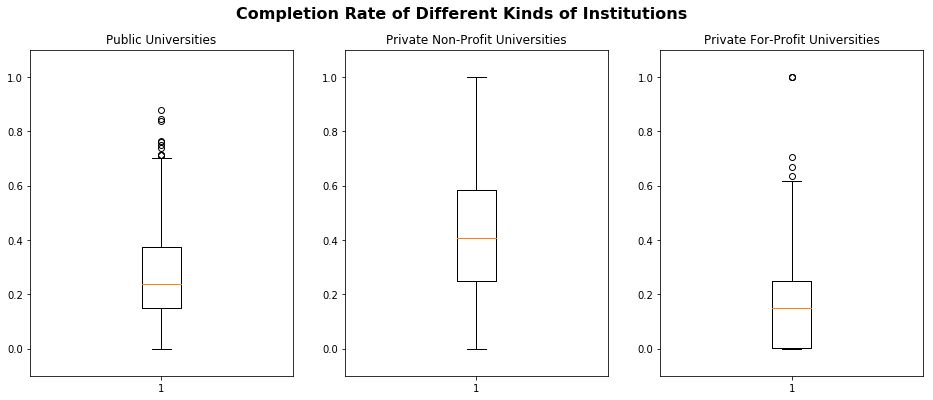

In [43]:
# plotting completion rates by type of institution

fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (16, 6))

fig.suptitle("Completion Rate of Different Kinds of Institutions", fontsize = 16, fontweight = "bold")

ax[0].boxplot(filtered_pub_cr)
ax[0].set_title("Public Universities")

ax[1].boxplot(filtered_nonprof_cr)
ax[1].set_title("Private Non-Profit Universities")

ax[2].boxplot(filtered_forprof_cr)
ax[2].set_title("Private For-Profit Universities")

for var in ax:
    var.set_ylim(-0.1, 1.1)


plt.show()

### Public, Private Nonprofit, For-Profit Universities: Earnings

In [44]:
# converting series into numpy arrays

pub_earn = public.Earnings.get_values()

nonprof_earn = nonprof.Earnings.get_values()

forprof_earn = forprof.Earnings.get_values()

In [45]:
# removing NaN values

filtered_pub_earn = pub_earn[~np.isnan(pub_earn)]

filtered_nonprof_earn = nonprof_earn[~np.isnan(nonprof_earn)]

filtered_forprof_earn = forprof_earn[~np.isnan(forprof_earn)]

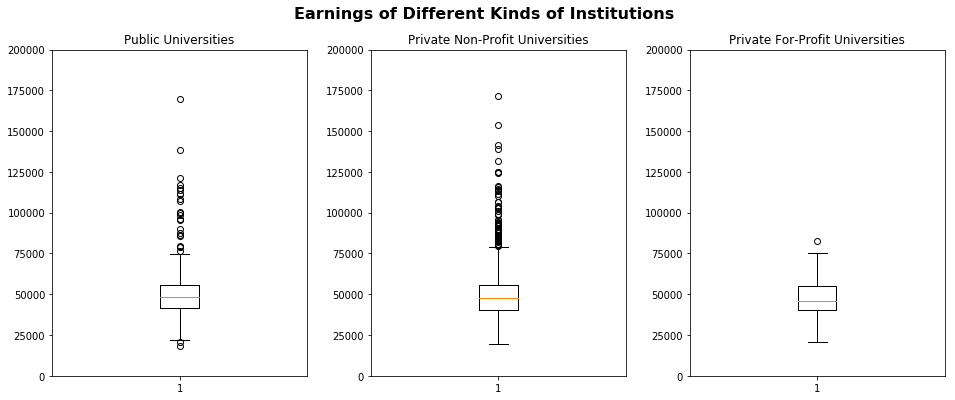

In [46]:
# plotting earnings by type of institution

fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (16, 6))

fig.suptitle("Earnings of Different Kinds of Institutions", fontsize = 16, fontweight = "bold")

plt.subplots_adjust(left = None, bottom = None, right = None, top = None, wspace = 0.25, hspace = None)

ax[0].boxplot(filtered_pub_earn)
ax[0].set_title("Public Universities")

ax[1].boxplot(filtered_nonprof_earn)
ax[1].set_title("Private Non-Profit Universities")

ax[2].boxplot(filtered_forprof_earn)
ax[2].set_title("Private For-Profit Universities")

for var in ax:
    var.set_ylim(0, 200000)

plt.show()

### Public, Private Nonprofit, For-Profit Universities: Earnings and Completion Rate

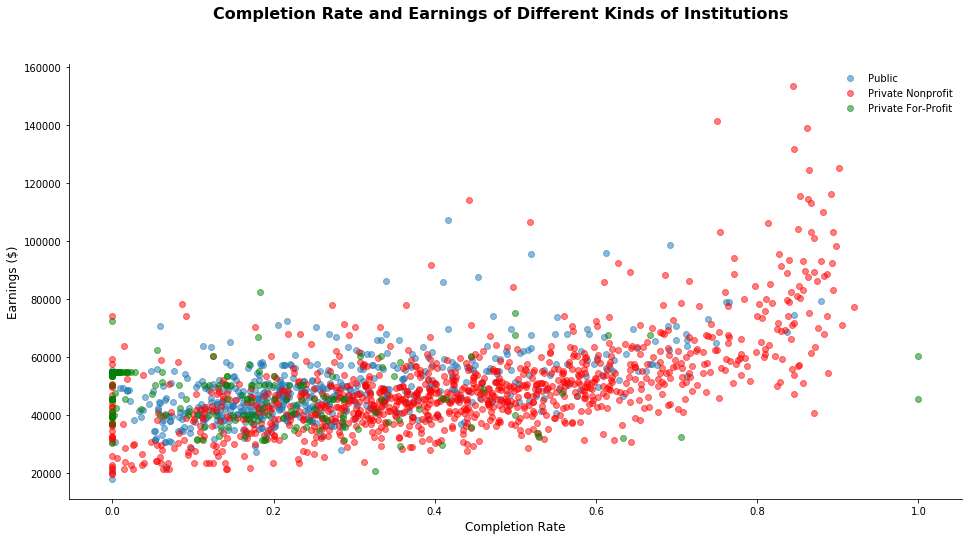

In [47]:
# scatterplot comparing earnings and completion rates of each kind of institution

fig, ax = plt.subplots(figsize = (16, 8))

fig.suptitle("Completion Rate and Earnings of Different Kinds of Institutions", fontsize = 16, 
             fontweight = "bold")

ax.scatter(public["Completion_Rate"], public["Earnings"], alpha = 0.5, label = "Public") # public
ax.scatter(nonprof["Completion_Rate"], nonprof["Earnings"], color = "r", alpha = 0.5, 
           label = "Private Nonprofit") # nonprofit
ax.scatter(forprof["Completion_Rate"], forprof["Earnings"], color = "g", alpha = 0.5, 
          label = "Private For-Profit") # for-profit

# legend
ax.legend(frameon = False)

# formatting
ax.set_xlabel("Completion Rate", fontsize = 12)
ax.set_ylabel("Earnings ($)", fontsize = 12)
    
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)


plt.show()

## Rankings 

In this part, I want to examine whether or not rankings really matter for student success. To do so, I refer to US News & World Report's rankings, pulling the top 50 national universities and top 50 liberal arts colleges. By comparing the graduation rates and earnings data of these top institutions with rankings, I hope to understand the relationship between rankings and student success.

In [48]:
# creating new dataframe out of scorecard with the just the top 50 nationally ranked universities

nu_rank = scorecard[scorecard.School_Name.isin(ranking.NU_School)]

In [50]:
# rename column

nu_rank.rename(columns = {"School_Name": "NU_School"}, inplace = True)

In [51]:
# merging scorecard and nu_rank dataframes to compare school ranking with earnings and completion rate

nu_rank_merged = pd.merge(nu_rank, ranking[["NU_School", "NU_Rank"]], on = "NU_School", how = 'inner')


nu_rank_merged

,NU_School,State,Degree_Type,Ownership,Earnings,Completion_Rate,NU_Rank
0,California Institute of Technology,CA,3,2,106300.0,0.8136,12
1,University of California-Berkeley,CA,3,1,79000.0,0.7618,22
2,University of California-Davis,CA,3,1,68100.0,0.5491,38
3,University of California-Irvine,CA,3,1,65800.0,0.7132,33
4,University of California-Los Angeles,CA,3,1,73200.0,0.7392,19
5,University of California-San Diego,CA,3,1,69600.0,0.5888,41
6,University of California-Santa Barbara,CA,3,1,62400.0,0.6907,30
7,Pepperdine University,CA,3,2,77600.0,0.7638,46
8,University of Southern California,CA,3,2,88800.0,0.7708,22
9,Yale University,CT,3,2,124400.0,0.8645,3


In [52]:
# creating new dataframe out of scorecard with the just the top 50 liberal arts colleges

la_rank = scorecard[scorecard.School_Name.isin(ranking.LA_School)]

In [53]:
# same as nu_rank
la_rank.rename(columns = {"School_Name": "LA_School", "State": "LA_State"}, inplace = True)

In [55]:
#same as la_rank_merged

la_rank_merged = pd.merge(la_rank, ranking[["LA_School", "LA_Rank"]], on = "LA_School", how = 'inner')

la_rank_merged

,LA_School,LA_State,Degree_Type,Ownership,Earnings,Completion_Rate,LA_Rank
0,Claremont McKenna College,CA,3,2,93200.0,0.8567,9.0
1,Harvey Mudd College,CA,3,2,104200.0,0.8505,18.0
2,Occidental College,CA,3,2,59400.0,0.7609,39.0
3,Pitzer College,CA,3,2,51500.0,0.8285,41.0
4,Pomona College,CA,3,2,77300.0,0.9202,5.0
5,Scripps College,CA,3,2,61800.0,0.7985,30.0
6,Thomas Aquinas College,CA,3,2,45900.0,0.7529,43.0
7,Colorado College,CO,3,2,49900.0,0.8243,27.0
8,Connecticut College,CT,3,2,62900.0,0.8094,46.0
9,Trinity College,CT,3,2,74300.0,0.8003,46.0


In [56]:
# dropping the wrong Union Colleges

la_rank_merged = la_rank_merged.drop([13, 14], axis = 0) 

### Rankings vs. Graduation Rate

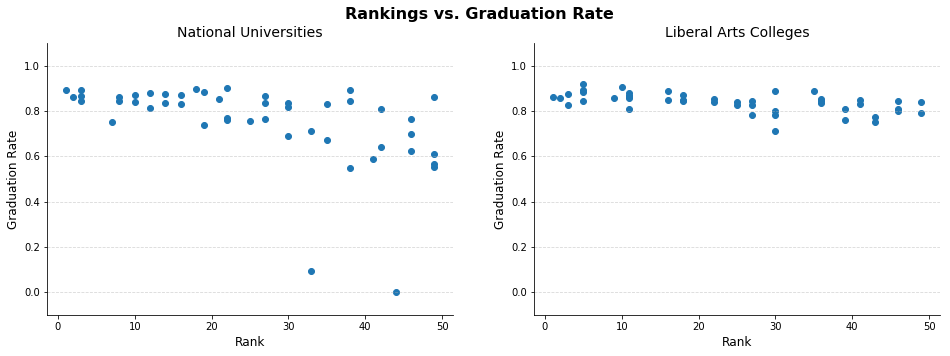

In [57]:
# examining the relationship with rankings and graduation rates
# Does ranking really matter?

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (16, 5))

fig.suptitle("Rankings vs. Graduation Rate", fontsize = 16, fontweight = "bold")

# NATIONAL UNIVERSITY RANK VS. GRADUATION RATE
ax[0].scatter(nu_rank_merged["NU_Rank"], nu_rank_merged["Completion_Rate"])

ax[0].set_title("National Universities", fontsize = 14)


# LIBERAL ARTS COLLEGE RANK VS. GRADUATION RATE
ax[1].scatter(la_rank_merged["LA_Rank"], la_rank_merged["Completion_Rate"])

ax[1].set_title("Liberal Arts Colleges", fontsize = 14)

# formatting
for var in ax:
    
    var.set_ylim(-0.1, 1.1)
    var.set_xlabel("Rank", fontsize = 12)
    var.set_ylabel("Graduation Rate", fontsize = 12)
    
    var.spines["right"].set_visible(False)
    var.spines["top"].set_visible(False)
    
    var.yaxis.grid(alpha= 0.5, linestyle= "--")

plt.show()

# note:  the two data points on the National Universities scatter plot are seemingly outliers. 
# upon further examination, the data pulled from College Scorecard may or may not have mistakes.

### Rankings vs. Mean Earnings

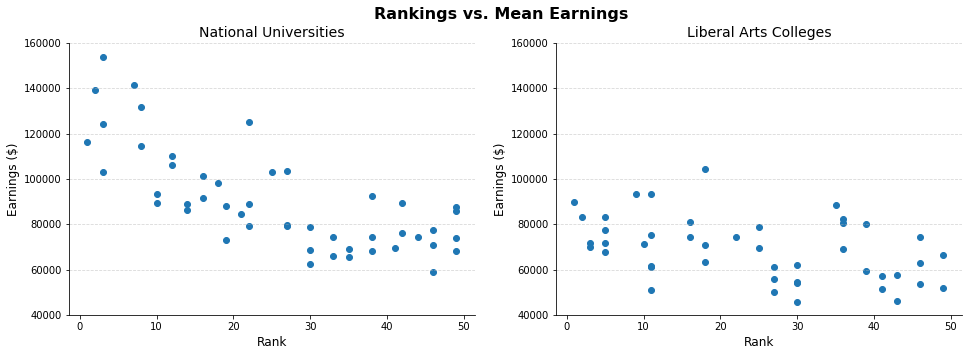

In [58]:
# examining the relationship with rankings and earnings
# Does ranking really matter?

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (16, 5))

fig.suptitle("Rankings vs. Mean Earnings", fontsize = 16, fontweight = "bold")

# NATIONAL UNIVERSITY RANK VS. EARNINGS
ax[0].scatter(nu_rank_merged["NU_Rank"], nu_rank_merged["Earnings"])

ax[0].set_title("National Universities", fontsize = 14)

# LIBERAL ARTS COLLEGE RANK VS. EARNINGS
ax[1].scatter(la_rank_merged["LA_Rank"], la_rank_merged["Earnings"])

ax[1].set_title("Liberal Arts Colleges", fontsize = 14)

# formatting
for var in ax:
    
    var.set_ylim(40000, 160000)
    
    var.set_xlabel("Rank", fontsize = 12)
    var.set_ylabel("Earnings ($)", fontsize = 12)
    
    var.spines["right"].set_visible(False)
    var.spines["top"].set_visible(False)
    
    var.yaxis.grid(alpha= 0.5, linestyle= "--")


plt.show()

## Graduation and Earnings Based on State

In [59]:
# grouping schools by state

state_group = scorecard.groupby(["State"])

transform_dict = {"Earnings": "mean", "Completion_Rate": "mean"}

# aggregating data to find the mean earnings and mean completion rate for each state

state_agg = state_group.agg(transform_dict)

# dropping Guam and Puerto Rico from the data

state_agg = state_agg.drop(["GU", "PR"], axis = 0)

state_agg

,Earnings,Completion_Rate
State,,
AK,47200.000000,0.206333
AL,41990.625000,0.206650
AR,42950.000000,0.269490
AZ,48973.913043,0.302918
CA,57203.225806,0.389475
CO,47203.448276,0.294607
CT,58920.000000,0.463604
DC,60300.000000,0.343167
DE,49500.000000,0.336900


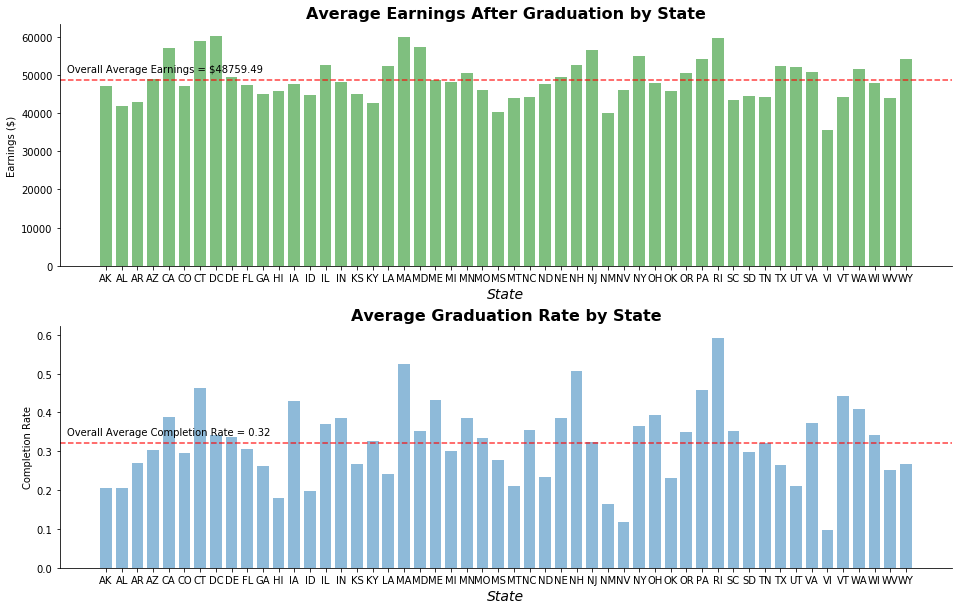

In [60]:
fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (16, 10))

plt.subplots_adjust(left = None, bottom = None, right = None, top = None, wspace = None, hspace = 0.25)

# MEAN EARNINGS BY STATE
ax[0].bar(state_agg.index, state_agg["Earnings"], width = 0.75, color = "g", alpha = 0.5)

ax[0].set_title("Average Earnings After Graduation by State", fontsize = 16, fontweight = "bold") # graph title
ax[0].set_ylabel("Earnings ($)") # y-axis label

# overall average earnings for the country
ax[0].axhline(y = state_agg["Earnings"].mean(), color = "r", alpha = 0.75, linestyle = "--", linewidth = 1.5)

# label for the horizontal line created in line 12
ax[0].text(-2.5, state_agg["Earnings"].mean() + 2000, 
           "Overall Average Earnings = $" + str(round(state_agg["Earnings"].mean(), 2)), fontsize = 10, 
           horizontalalignment='left')


# MEAN GRADUATION RATE BY STATE
ax[1].bar(state_agg.index, state_agg["Completion_Rate"], width = 0.75, alpha = 0.5)

ax[1].set_title("Average Graduation Rate by State", fontsize = 16, fontweight = "bold") # graph title
ax[1].set_ylabel("Completion Rate") # y-axis label

# overall average graduation rate for the country
ax[1].axhline(y = state_agg["Completion_Rate"].mean(), color = "r", alpha = 0.75, linestyle = "--", 
              linewidth = 1.5)

# label for the horizontal line created in line 27
ax[1].text(-2.5, state_agg["Completion_Rate"].mean() + 0.02, 
           "Overall Average Completion Rate = " + str(round(state_agg["Completion_Rate"].mean(), 2)), 
           fontsize = 10, horizontalalignment='left')

# formatting
for var in ax:
    var.set_xlabel("State", fontsize = 14, fontstyle = "italic")
    
    var.spines["right"].set_visible(False)
    var.spines["top"].set_visible(False)


plt.show()

## Conclusion

After conducting all of the comparisons across various factors, I have found the following for each of the factors.

### Control
Public and private nonprofit universities have higher median completion rates than private forprofit universities. However, the median earnings for the three kinds of universities are approximately the same. Public and private nonprofit universities have significantly higher earnings outside of the interquartile range.


### Rankings
When comparing the top 50 national universities and liberal arts colleges, there seems to be a slight correlation where higher ranked universities have higher completion rates. This difference is much more pronounced for national universities than it is for liberal arts colleges. The opposite is true when it comes to earnings - higher ranked national universities have higher mean earnings than those that are ranked lower.


### State
While average graduation rates of each state vary a lot, the average earnings after graduation by state vary less so. In many cases, states that have below-average graduation rates also have below-average earnings after graduation.


### Final Thoughts
While some conclusions can be drawn from the data, these insights can be broken down even further. For example, I only examined 4-year graduation rates, but schools themselves often look at 6-year graduation rates. Furthermore, in the rankings comparisons, there are many other factors at play that affect graduation rates and earnings, such as students who leave school to start their own businesses, transfers, and college major. 
